# VO9 Monte Carlo Simulations

In [1]:
import numpy as np
import random
import math

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

## Weather Markov Chain

In [68]:
class MarkovChain(object):
    def __init__(self, states, trans_matrix):
        self.trans_matrix = trans_matrix
        self.states = states
        self.trans_prob = {}
        
        for i in range(len(states)):
            assert round(sum(trans_matrix[i]), 2) == 1
            self.trans_prob[states[i]] = dict(zip(states, trans_matrix[i]))
            
        self.chain = np.random.choice(states)

    def init_chain(self):
        return [self.chain]
            
    def next_state(self, curr_state):
        return np.random.choice(states, p = [
            self.trans_prob[curr_state][state] for state in states])
    
    def gen_chain(self, chain, iterations):
        for _ in range(iterations):
            chain.append(self.next_state(chain[-1]))            
        return chain

In [69]:
states = ["sunny", "cloudy", "rainy"]

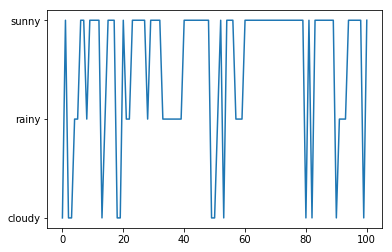

In [70]:
trans_matrix = [
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.4, 0.1, 0.5]
]

mc = MarkovChain(states, trans_matrix)
chain = mc.init_chain()
chain = mc.gen_chain(chain, 100)

plt.plot(chain)
plt.show()
plt.close()

lets generate more stable weather...


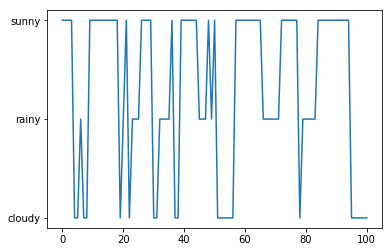

In [74]:
print("lets generate more stable weather...")
trans_matrix = [
    [0.8, 0.15, 0.05],
    [0.2, 0.6, 0.2],
    [0.3, 0.05, 0.65]
]

mc = MarkovChain(states, trans_matrix)
chain = mc.init_chain()
chain = mc.gen_chain(chain, 100)

plt.plot(chain)
plt.show()
plt.close()

## Continous State Markov Chain

In [169]:
class MarkovChain(object):
    def __init__(self):
        self.fist_elem = random.gauss(1,1)
        self.check_transition_prob()

    def init_chain(self):
        return [self.fist_elem]
            
    def transition_prob(self, x, y):
        return np.exp(-(y-x)**2/2)/np.sqrt(2*np.pi)
    
    def check_transition_prob(self):
        length = 1000000
        x_axis = 10
        x = random.gauss(1,1)
        count = 0
        print("run transition probability funciton check")

        for i in tqdm(range(length)):
            if(mc.transition_prob(x, random.random()*10-5) >= random.random()):
                count += 1
                
        assert round(x_axis*count/length, 2) == 1
        print("check successful")
        
    def next_state(self, curr_state):
        while(True):
            next_state = random.gauss(1,1)
            if (self.transition_prob(next_state, curr_state) >= random.random()):
                return next_state
    
    def gen_chain(self, chain, iterations):
        for _ in range(iterations):
            chain.append(self.next_state(chain[-1]))            
        return chain

run transition probability funciton check



check successful


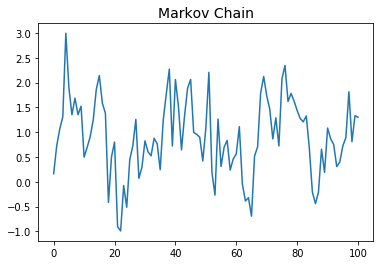

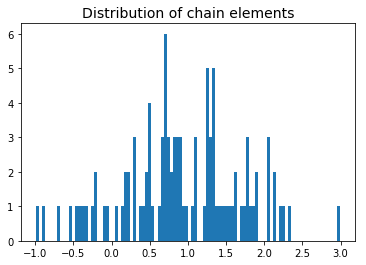

In [175]:
mc = MarkovChain()
chain = mc.init_chain()
chain = mc.gen_chain(chain, 100)

plt.title("Markov Chain", fontsize=14)
plt.plot(chain)
plt.show()
plt.close()

plt.title("Distribution of chain elements", fontsize=14)
plt.hist(chain, bins=100)
plt.show()
plt.close()